In [1]:
# Implementation from https://dev.to/davidisrawi/build-a-quick-summarizer-with-python-and-nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

text_str = '''
Those Who Are Resilient Stay In The Game Longer
“On the mountains of truth you can never climb in vain: either you will reach a point higher up today, or you will be training your powers so that you will be able to climb higher tomorrow.” — Friedrich Nietzsche
Challenges and setbacks are not meant to defeat you, but promote you. However, I realise after many years of defeats, it can crush your spirit and it is easier to give up than risk further setbacks and disappointments. Have you experienced this before? To be honest, I don’t have the answers. I can’t tell you what the right course of action is; only you will know. However, it’s important not to be discouraged by failure when pursuing a goal or a dream, since failure itself means different things to different people. To a person with a Fixed Mindset failure is a blow to their self-esteem, yet to a person with a Growth Mindset, it’s an opportunity to improve and find new ways to overcome their obstacles. Same failure, yet different responses. Who is right and who is wrong? Neither. Each person has a different mindset that decides their outcome. Those who are resilient stay in the game longer and draw on their inner means to succeed.
I’ve coached mummy and mom clients who gave up after many years toiling away at their respective goal or dream. It was at that point their biggest breakthrough came. Perhaps all those years of perseverance finally paid off. It was the 19th Century’s minister Henry Ward Beecher who once said: “One’s best success comes after their greatest disappointments.” No one knows what the future holds, so your only guide is whether you can endure repeated defeats and disappointments and still pursue your dream. Consider the advice from the American academic and psychologist Angela Duckworth who writes in Grit: The Power of Passion and Perseverance: “Many of us, it seems, quit what we start far too early and far too often. Even more than the effort a gritty person puts in on a single day, what matters is that they wake up the next day, and the next, ready to get on that treadmill and keep going.”
I know one thing for certain: don’t settle for less than what you’re capable of, but strive for something bigger. Some of you reading this might identify with this message because it resonates with you on a deeper level. For others, at the end of their tether the message might be nothing more than a trivial pep talk. What I wish to convey irrespective of where you are in your journey is: NEVER settle for less. If you settle for less, you will receive less than you deserve and convince yourself you are justified to receive it.
“Two people on a precipice over Yosemite Valley” by Nathan Shipps on Unsplash
Develop A Powerful Vision Of What You Want
“Your problem is to bridge the gap which exists between where you are now and the goal you intend to reach.” — Earl Nightingale
I recall a passage my father often used growing up in 1990s: “Don’t tell me your problems unless you’ve spent weeks trying to solve them yourself.” That advice has echoed in my mind for decades and became my motivator. Don’t leave it to other people or outside circumstances to motivate you because you will be let down every time. It must come from within you. Gnaw away at your problems until you solve them or find a solution. Problems are not stop signs, they are advising you that more work is required to overcome them. Most times, problems help you gain a skill or develop the resources to succeed later. So embrace your challenges and develop the grit to push past them instead of retreat in resignation. Where are you settling in your life right now? Could you be you playing for bigger stakes than you are? Are you willing to play bigger even if it means repeated failures and setbacks? You should ask yourself these questions to decide whether you’re willing to put yourself on the line or settle for less. And that’s fine if you’re content to receive less, as long as you’re not regretful later.
If you have not achieved the success you deserve and are considering giving up, will you regret it in a few years or decades from now? Only you can answer that, but you should carve out time to discover your motivation for pursuing your goals. It’s a fact, if you don’t know what you want you’ll get what life hands you and it may not be in your best interest, affirms author Larry Weidel: “Winners know that if you don’t figure out what you want, you’ll get whatever life hands you.” The key is to develop a powerful vision of what you want and hold that image in your mind. Nurture it daily and give it life by taking purposeful action towards it.
Vision + desire + dedication + patience + daily action leads to astonishing success. Are you willing to commit to this way of life or jump ship at the first sign of failure? I’m amused when I read questions written by millennials on Quora who ask how they can become rich and famous or the next Elon Musk. Success is a fickle and long game with highs and lows. Similarly, there are no assurances even if you’re an overnight sensation, to sustain it for long, particularly if you don’t have the mental and emotional means to endure it. This means you must rely on the one true constant in your favour: your personal development. The more you grow, the more you gain in terms of financial resources, status, success — simple. If you leave it to outside conditions to dictate your circumstances, you are rolling the dice on your future.
So become intentional on what you want out of life. Commit to it. Nurture your dreams. Focus on your development and if you want to give up, know what’s involved before you take the plunge. Because I assure you, someone out there right now is working harder than you, reading more books, sleeping less and sacrificing all they have to realise their dreams and it may contest with yours. Don’t leave your dreams to chance.
'''


def _create_frequency_table(text_string) -> dict:
    """
    we create a dictionary for the word frequency table.
    For this, we should only use the words that are not part of the stopWords array.
    Removing stop words and making frequency table
    Stemmer - an algorithm to bring words to its root word.
    :rtype: dict
    """
    stopWords = set(stopwords.words("english"))
    words = word_tokenize(text_string)
    ps = PorterStemmer()

    freqTable = dict()
    for word in words:
        word = ps.stem(word)
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

    return freqTable


def _score_sentences(sentences, freqTable) -> dict:
    """
    score a sentence by its words
    Basic algorithm: adding the frequency of every non-stop word in a sentence divided by total no of words in a sentence.
    :rtype: dict
    """

    sentenceValue = dict()

    for sentence in sentences:
        word_count_in_sentence = (len(word_tokenize(sentence)))
        word_count_in_sentence_except_stop_words = 0
        for wordValue in freqTable:
            if wordValue in sentence.lower():
                word_count_in_sentence_except_stop_words += 1
                if sentence[:10] in sentenceValue:
                    sentenceValue[sentence[:10]] += freqTable[wordValue]
                else:
                    sentenceValue[sentence[:10]] = freqTable[wordValue]

        sentenceValue[sentence[:10]] = sentenceValue[sentence[:10]] / word_count_in_sentence_except_stop_words

        '''
        Notice that a potential issue with our score algorithm is that long sentences will have an advantage over short sentences. 
        To solve this, we're dividing every sentence score by the number of words in the sentence.
        
        Note that here sentence[:10] is the first 10 character of any sentence, this is to save memory while saving keys of
        the dictionary.
        '''

    return sentenceValue


def _find_average_score(sentenceValue) -> int:
    """
    Find the average score from the sentence value dictionary
    :rtype: int
    """
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original text
    average = (sumValues / len(sentenceValue))

    return average


def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:10] in sentenceValue and sentenceValue[sentence[:10]] >= (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary


def run_summarization(text):
    # 1 Create the word frequency table
    freq_table = _create_frequency_table(text)

    '''
    We already have a sentence tokenizer, so we just need 
    to run the sent_tokenize() method to create the array of sentences.
    '''

    # 2 Tokenize the sentences
    sentences = sent_tokenize(text)

    # 3 Important Algorithm: score the sentences
    sentence_scores = _score_sentences(sentences, freq_table)

    # 4 Find the threshold
    threshold = _find_average_score(sentence_scores)

    # 5 Important Algorithm: Generate the summary
    summary = _generate_summary(sentences, sentence_scores, 1.3 * threshold)

    return summary


if __name__ == '__main__':
    result = run_summarization(text_str)
print(result)

 To be honest, I don’t have the answers. Same failure, yet different responses. Neither. Don’t leave it to other people or outside circumstances to motivate you because you will be let down every time. And that’s fine if you’re content to receive less, as long as you’re not regretful later. Commit to it. Nurture your dreams. Don’t leave your dreams to chance.


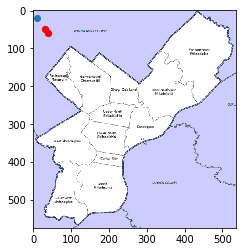

In [7]:
import matplotlib.pyplot as plt
im = plt.imread('PhilaDistrict.PNG')
implot = plt.imshow(im)

# put a blue dot at (10, 20)
plt.scatter([10], [20])

# put a red dot, size 40, at 2 locations:u
plt.scatter(x=[30, 40], y=[50, 60], c='r', s=40)

plt.show()

In [11]:
x = 'Predicting Opioid epidemic progression from EMS radio audio'
print(len(x))

59
